In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import Image
import time
import warnings
import seaborn as sns 
warnings.filterwarnings('ignore')
%matplotlib inline
mpl.rcParams['axes.unicode_minus']=False   

### １.データ導入

####  練習用データ：あるネット通販店の2022の注文データ

In [3]:
df = pd.read_excel(r'./order2022.xlsx', dtype={'order_time':str, 'payment_time':str})

# 時間列をデフォルト設定のdatetime64で正しく読み込めないため、まずstring型として読み込む。

In [4]:
df.head()
# 前五行を示し、DataFrameの構造を観察する

,id,order_id,user_id,product_id,nominal_price,actual_payment,route_id,platform,order_time,payment_time,sales_return
0,8,sys-2021-306447069,user-104863,PR000499,499.41,480.42,1.0,wechat_official_account,2022-01-01 01:05:50,2022-01-01 01:06:17,No
1,11,sys-2021-417411381,user-181957,PR000483,279.53,279.53,1.0,APP,2022-01-01 01:36:17,2022-01-01 01:36:56,No
2,61,sys-2021-313655292,user-282453,PR000154,1658.95,1653.91,1.0,wechat_official_account,2022-01-01 12:01:04,2022-01-01 12:03:20,No
3,78,sys-2021-311884106,user-167776,PR000215,343.25,337.12,1.0,APP,2022-01-01 12:47:02,2022-01-01 12:47:21,No
4,81,sys-2021-375273222,user-138024,PR000515,329.04,329.04,1.0,APP,2022-01-01 12:50:23,2022-01-01 12:50:50,No


In [5]:
df.shape
# dfの規模を確認する

(104557, 11)

In [6]:
df.info()
# 各列内の状況を把握する（dtypeとnullが存在するかどうかなど）

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104557 entries, 0 to 104556
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              104557 non-null  int64  
 1   order_id        104557 non-null  object 
 2   user_id         104557 non-null  object 
 3   product_id      104557 non-null  object 
 4   nominal_price   104557 non-null  float64
 5   actual_payment  104557 non-null  float64
 6   route_id        104549 non-null  float64
 7   platform        104557 non-null  object 
 8   order_time      104557 non-null  object 
 9   payment_time    104557 non-null  object 
 10  sales_return    104557 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 8.8+ MB


root_id のNon-Nullは104549<104557、列内nullがある

In [7]:
df.describe()
# 記述統計を示す

,id,nominal_price,actual_payment,route_id
count,104557.000000,104557.000000,104557.000000,104549.000000
mean,52279.000000,1049.681521,1167.494225,9.204765
std,30183.150385,1054.409968,2174.024855,4.440983
min,1.000000,6.100000,-12.470000,1.000000
25%,26140.000000,432.040000,383.660000,6.000000
50%,52279.000000,679.320000,641.230000,10.000000
75%,78418.000000,1248.280000,1252.630000,13.000000
max,104557.000000,28465.250000,83270.053829,15.000000


actual_paymentの最小値は負数、異常値がある

### ２.データクレンジング


In [8]:
df.columns = df.columns.str.strip()
df.columns
# もし列名の左右（先頭・末尾）両方の空白を削除する

Index(['id', 'order_id', 'user_id', 'product_id', 'nominal_price',
       'actual_payment', 'route_id', 'platform', 'order_time', 'payment_time',
       'sales_return'],
      dtype='object')

In [9]:
df.duplicated().sum()

# すべての列の値は全部重複する場合にを True（１） としたブール値。
# sum()　は全部何行あるを統計して観察するために使う。

0

In [10]:
df.isnull().sum()

# 各列のnull値の個数を示す

id                0
order_id          0
user_id           0
product_id        0
nominal_price     0
actual_payment    0
route_id          8
platform          0
order_time        0
payment_time      0
sales_return      0
dtype: int64

route_id にnull値は８個ある

In [11]:
a = [1,1,1]

dftem = pd.DataFrame({"q":a,"w":a,"e":a})
dftem

,q,w,e
0,1,1,1
1,1,1,1
2,1,1,1


In [12]:
df.dropna(inplace=True)
# null値を削除して、inplace = Trueで元のデータを置換する

df.isnull().sum()

id                0
order_id          0
user_id           0
product_id        0
nominal_price     0
actual_payment    0
route_id          0
platform          0
order_time        0
payment_time      0
sales_return      0
dtype: int64

null値の８行は削除された

In [13]:
abnormal=df[np.where(df['actual_payment'] < 0,True,False)]
abnormal

# 決済金額は負数の行を探り出して、確認する

,id,order_id,user_id,product_id,nominal_price,actual_payment,route_id,platform,order_time,payment_time,sales_return
23860,66573,sys-2021-288096069,user-186966,PR000511,136.99,-12.34,5.0,APP,2022-09-08 21:32:54,2022-09-08 21:33:10,No
24753,96939,sys-2021-323229098,user-198083,PR000548,126.92,-11.13,5.0,APP,2022-12-10 14:24:13,2022-12-10 14:24:26,Yes
29600,31393,sys-2021-296608442,user-212991,PR000385,112.91,-10.17,7.0,APP,2022-05-24 08:52:04,2022-05-24 08:52:23,No
35486,999,sys-2021-324068352,user-112962,PR000602,364.08,-12.47,8.0,wechat_official_account,2022-01-04 10:47:05,2022-01-04 10:47:05,No
62781,72266,sys-2021-316685479,user-189901,PR000554,2287.74,-10.98,11.0,wechat_official_account,2022-09-28 11:57:46,2022-09-28 11:57:46,No
71784,18684,sys-2021-311194385,user-110299,PR000797,118.06,-10.08,13.0,web,2022-04-06 11:20:43,2022-04-06 11:21:31,No


In [14]:
abindex = abnormal.index
abindex

# 上述の異常値がある行のindexを抽出する

Int64Index([23860, 24753, 29600, 35486, 62781, 71784], dtype='int64')

In [15]:
df.drop(abindex,inplace=True)

# 異常値がある行を削除する

In [16]:
df.route_id = df.route_id.astype(int)

# route_id は序数であるため、floatからintへ変換する。

In [17]:
df.shape

(104543, 11)

104557 - null値の8行 - 異常値の6行　= 104543 

歪度 3.1440133730424478
尖度 21.80010550560282


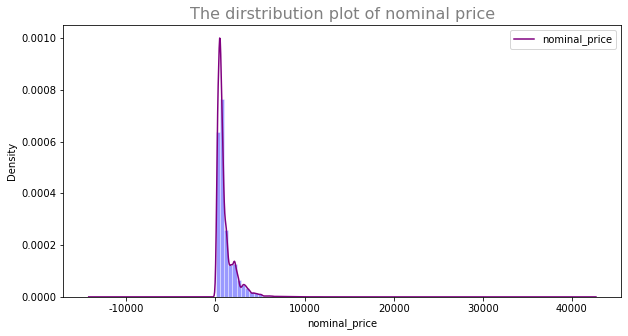

In [18]:
plt.figure(figsize=(10,5))
plt.hist(df['nominal_price'],bins=60,
         color='b',label='nominal_price',
         histtype='bar',density=True,
         edgecolor = 'white',alpha=0.4)
plt.title('The dirstribution plot of nominal price',fontdict={'fontsize':16,'color':'gray'})
plt.xlabel('nominal_price')
plt.ylabel('density')
plt.legend(loc = 'best') 

# ヒストグラフの部分を作成する

data1=df['nominal_price']
data1.plot(kind='kde',color='purple')
# カーネル密度推定のグラフを出力して、データサンプル分布を観察する

print('歪度',data1.skew())
print('尖度',data1.kurtosis())


歪度 12.431755865938815
尖度 248.73275784431132


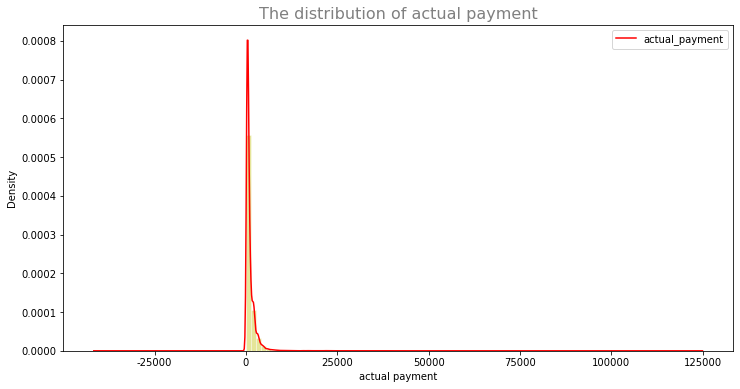

In [20]:
#用直方图和核密度看下‘付款金额’的数据分布
plt.figure(figsize=(12,6))
plt.hist(df['actual_payment'],bins=60,
         color='y',label='actual_payment',
         histtype='bar',density=True,
         edgecolor = 'white',alpha=0.4)
plt.title('The distribution of actual payment',fontdict={'fontsize':16,'color':'grey'})
plt.xlabel('actual payment')
plt.ylabel('denstity')
plt.legend(loc = 'best')

data2=df['actual_payment']
data2.plot(kind='kde',color='r')

print('歪度',data2.skew())
print('尖度',data2.kurtosis())

# 同じく支払金額の分布図を出力する

２つのグラフにより、
+ 注文金額も支払金額も非対称で、左側にコブがある
+ 裾が軽くて、グループ値かなり離れている値が存在している。統計学の角度から、それを異常値と見なすべきだと考える。
+ ビジネスの観点から見ると、高額な注文をするのはごく一部の人だけであり、そのような顧客はかなり大きなビジネス価値を持っています。そのため、異常値として扱うのではなく、逆に特別なサービスで対応すべきだと考える。

故に、現時点ではそれらのデータを処理しないことになる。

### ３. 顧客層の分析

In [21]:
df.groupby(['sales_return']).agg({'user_id':['count']})

#　返品した記録がある顧客の人数

,user_id
,count
sales_return,
No,90763
Yes,13780


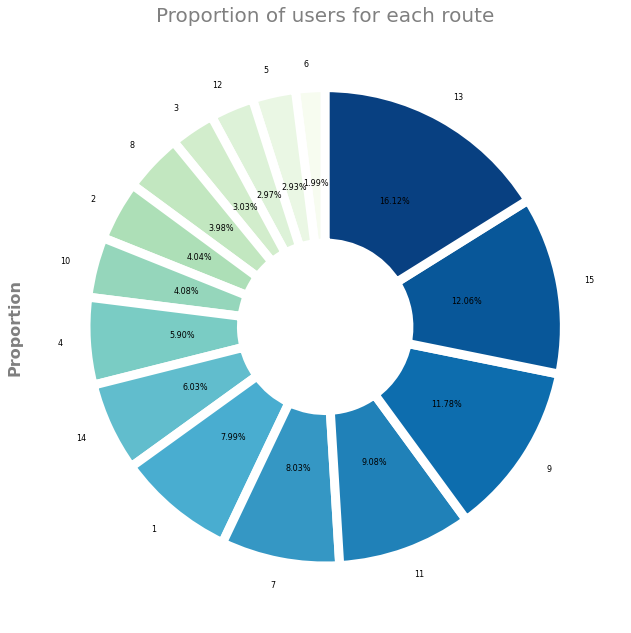

In [22]:
df_p = df.groupby('route_id')['user_id'].count().sort_values(ascending=True)
df_p.plot.pie(figsize=(11,11), labels=df_p.index,autopct='%0.2f%%',fontsize='8',startangle=-270, wedgeprops= dict(edgecolor='w', width=0.65, linewidth=9),cmap = 'GnBu')
plt.title('Proportion of users for each route',size=20,color='grey')
plt.ylabel('Proportion',fontweight='bold',fontsize='16',color='grey')
plt.show()     

ユーザーのソースとして、主にルート13、15、9がトップ3である。この3つのルートにすでに投資されたリソースを参考にして、もし現在の投資リソース割合がそれほど高くない場合は、これら3つのルートへのリソース増えるのは増客の一策だと考える。

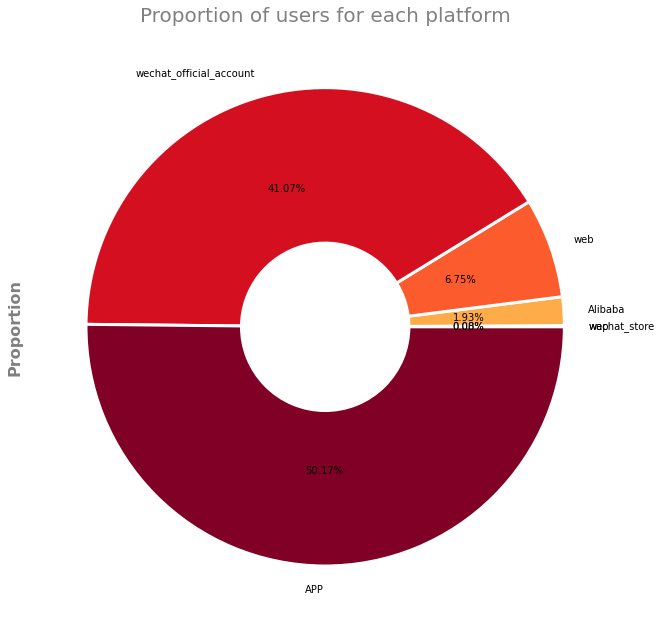

In [23]:
#平台订单支付情况
#订单支付主要是来自于APP和微信公众号,应该重点在这两个平台推广
df_p = df.groupby('platform')['user_id'].count().sort_values(ascending = True)
df_p.plot.pie(figsize=(11,11),labels=df_p.index,autopct='%0.2f%%',fontsize='10',startangle=0, wedgeprops=dict(edgecolor='w', width=0.65, linewidth=3),cmap = 'YlOrRd')
plt.title('Proportion of users for each platform',size=20,color='grey')
plt.ylabel('Proportion',fontweight='bold',fontsize='16',color='grey')
plt.show()

全体の9割は、アプリとWeChat公式アカウントを通じて注文されています。これら2つのプラットフォームを中心に事業を展開すべきだと考える。

### RFM分析

In [24]:
df1 = df[np.where(df['sales_return']=='No',True,False)]

sum(df1['sales_return']=='Yes')

# まずは返品した記録を除外したdf1を作成する

0

In [25]:
df2=df1.loc[:,['order_id','user_id','actual_payment','payment_time']]
df2.head()

#  RFM分析で、Recency （直近いつ）、Frequency （頻度）、Monetary （購入金額）の3つの指標を算出するに必要な列だけを抽出して、df2を作成する。

,order_id,user_id,actual_payment,payment_time
0,sys-2021-306447069,user-104863,480.42,2022-01-01 01:06:17
1,sys-2021-417411381,user-181957,279.53,2022-01-01 01:36:56
2,sys-2021-313655292,user-282453,1653.91,2022-01-01 12:03:20
3,sys-2021-311884106,user-167776,337.12,2022-01-01 12:47:21
4,sys-2021-375273222,user-138024,329.04,2022-01-01 12:50:50


In [26]:
df2['payment_time'] = pd.to_datetime(df2['payment_time'],format='%Y%m%d %H:%M:%S')
# 取引日付のタイプをstringからdatetimeに変換する

df2['Recent'] = pd.to_datetime('2023-01-01') - df2['payment_time']
# 2023年01月01日を基準日と仮定して分析する

df2['Recent']

0        364 days 22:53:43
1        364 days 22:23:04
2        364 days 11:56:40
3        364 days 11:12:39
4        364 days 11:09:10
                ...       
104544   364 days 02:38:05
104545   364 days 02:02:02
104546   364 days 01:54:20
104547   364 days 00:35:57
104548   364 days 00:29:55
Name: Recent, Length: 90763, dtype: timedelta64[ns]

In [27]:
df2['Recent'] = df2['Recent'].dt.days

df2['Recent']
# 便宜上、日の部分だけを保留する

0         364
1         364
2         364
3         364
4         364
         ... 
104544    364
104545    364
104546    364
104547    364
104548    364
Name: Recent, Length: 90763, dtype: int64

In [28]:
df2.tail()

# 先頭のデータは日付が一致しているため、末尾のデータを観察する

,order_id,user_id,actual_payment,payment_time,Recent
104544,sys-2020-247689274,user-254850,179.56,2022-01-01 21:21:55,364
104545,sys-2020-250518601,user-291340,1407.60,2022-01-01 21:57:58,364
104546,sys-2020-260463573,user-280181,732.37,2022-01-01 22:05:40,364
104547,sys-2020-310196315,user-235227,256.74,2022-01-01 23:24:03,364
104548,sys-2020-257204000,user-157645,161.28,2022-01-01 23:30:05,364


In [29]:
R = df2.groupby(by=['user_id'],as_index=False)['Recent'].agg('min')
R

# 各顧客の最新購買日から基準日までの日数のDataFrameを作成する。

,user_id,Recent
0,user-100000,79
1,user-100003,221
2,user-100006,47
3,user-100007,351
4,user-100008,45
...,...,...
71248,user-299980,74
71249,user-299983,4
71250,user-299989,50
71251,user-299992,364


In [30]:
F = df2.groupby(by=['user_id'],as_index=False)['order_id'].agg('count')
F

# 各顧客の購買頻度のDataFrameを作成する

,user_id,order_id
0,user-100000,1
1,user-100003,1
2,user-100006,1
3,user-100007,1
4,user-100008,1
...,...,...
71248,user-299980,2
71249,user-299983,1
71250,user-299989,2
71251,user-299992,1


In [31]:
M = df2.groupby(by=['user_id'],as_index=False)['actual_payment'].agg('sum')
M

# 各顧客の総合購買金額のDataFrameを作成する

,user_id,actual_payment
0,user-100000,1770.81
1,user-100003,511.59
2,user-100006,443.55
3,user-100007,2162.14
4,user-100008,4879.94
...,...,...
71248,user-299980,719.77
71249,user-299983,706.80
71250,user-299989,1637.47
71251,user-299992,440.17


In [32]:
RFM = R.merge(F).merge(M)
RFM.columns = ['user_id','R','F','M']

RFM.head()

,user_id,R,F,M
0,user-100000,79,1,1770.81
1,user-100003,221,1,511.59
2,user-100006,47,1,443.55
3,user-100007,351,1,2162.14
4,user-100008,45,1,4879.94


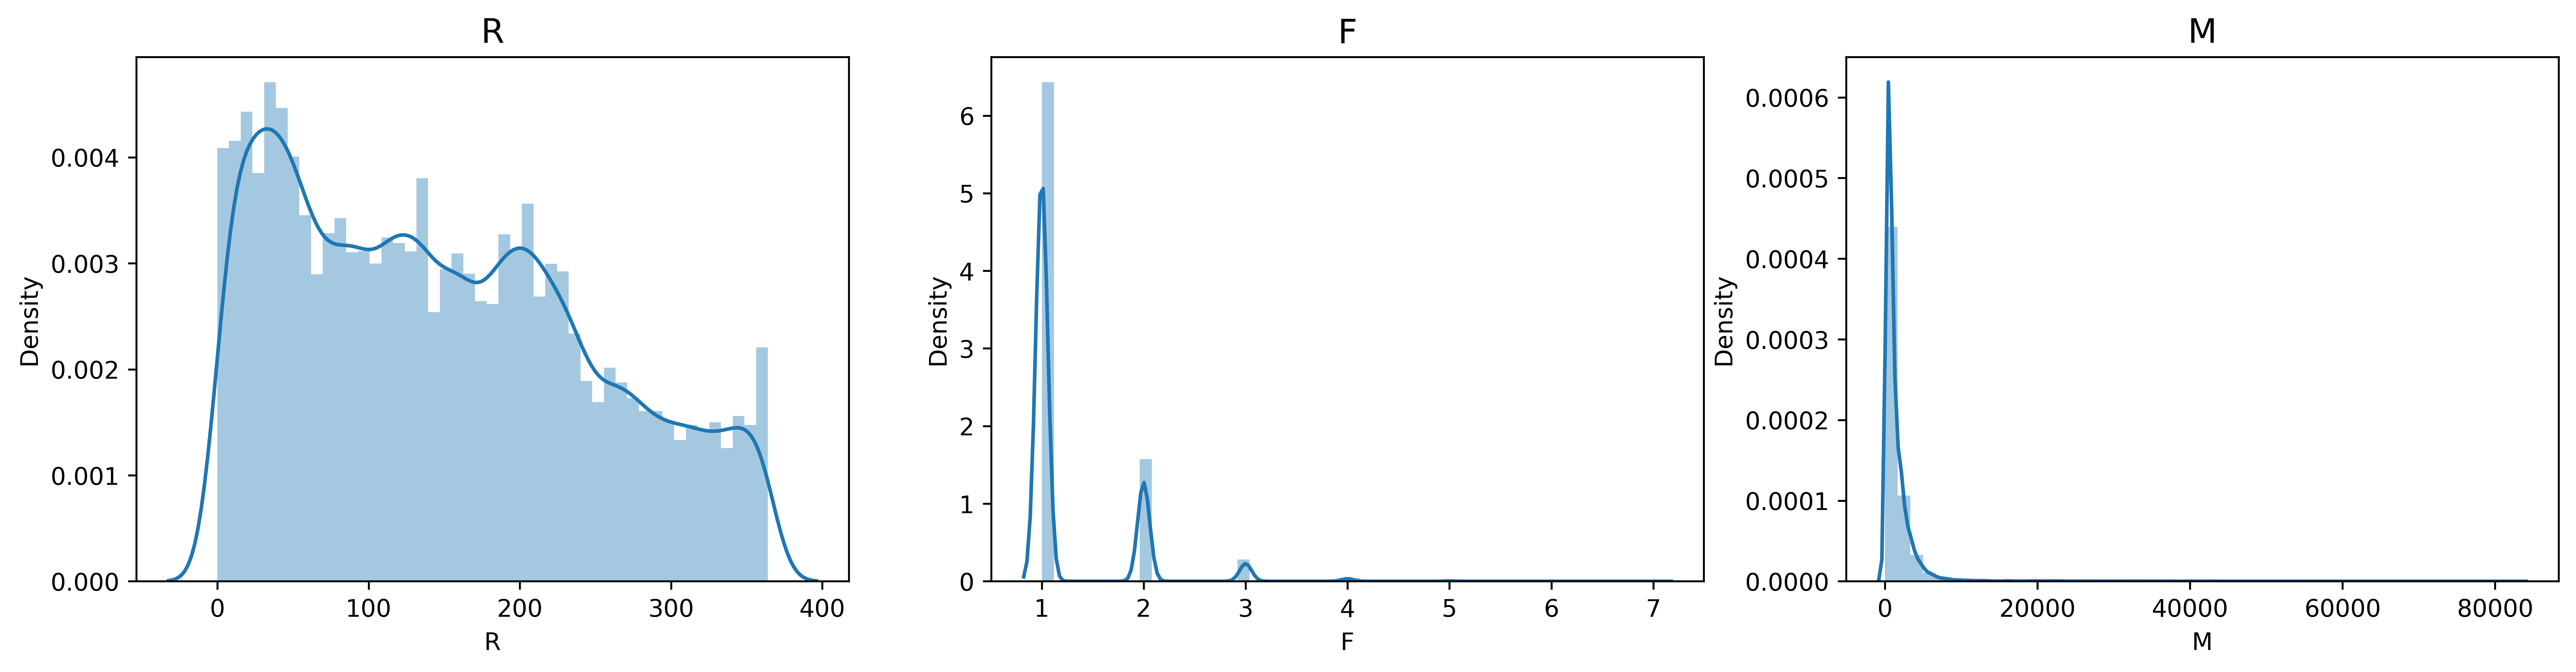

In [33]:
def data_distribution(keyvalue,data):
    plt.figure(figsize = (18,4), dpi = 600)
    j = 1 
    for i in keyvalue:
        plt.subplot(1,3,j)
        sns.distplot(data[i])
        plt.title(i, fontsize = 14)
        j += 1
keyvalue = ['R','F','M']
data_distribution(keyvalue, RFM)

分布図からすると、頻度と金額の部分にロングテールがあり、パレートの法則に合致している

In [34]:
RFM.describe()

,R,F,M
count,71253.000000,71253.000000,71253.000000
mean,149.192652,1.273813,1487.032320
std,100.123408,0.552269,2563.956462
min,0.000000,1.000000,0.000000
25%,60.000000,1.000000,449.090000
50%,138.000000,1.000000,805.280000
75%,223.000000,1.000000,1779.580000
max,364.000000,7.000000,83270.053829


記述統計からは、F列の75％までが1であることがわかる。そのため、分位数での格付けは困難である。平均値を閾値として、RFM評点を0,1に分けていく。

In [35]:
RFM['R_S']=np.where(RFM['R']>=RFM['R'].mean(),0,1)
# recentだけ小さければ小さいほど評価がいい
RFM['F_S']=np.where(RFM['F']>=RFM['F'].mean(),1,0)
RFM['M_S']=np.where(RFM['M']>=RFM['M'].mean(),1,0)

RFM.head()

,user_id,R,F,M,R_S,F_S,M_S
0,user-100000,79,1,1770.81,1,0,1
1,user-100003,221,1,511.59,0,0,0
2,user-100006,47,1,443.55,1,0,0
3,user-100007,351,1,2162.14,0,0,1
4,user-100008,45,1,4879.94,1,0,1


In [36]:
RFM_Score = RFM.loc[:,['user_id','R_S','F_S','M_S']]

RFM_Score.head()

,user_id,R_S,F_S,M_S
0,user-100000,1,0,1
1,user-100003,0,0,0
2,user-100006,1,0,0
3,user-100007,0,0,1
4,user-100008,1,0,1


In [37]:
RFM_Score['RFM']= RFM_Score['R_S'].map(str)+RFM_Score['F_S'].map(str)+RFM_Score['M_S'].map(str)
RFM_Score.head()

# 総合指標の格付けを作る

,user_id,R_S,F_S,M_S,RFM
0,user-100000,1,0,1,101
1,user-100003,0,0,0,000
2,user-100006,1,0,0,100
3,user-100007,0,0,1,001
4,user-100008,1,0,1,101


In [38]:
CustomerType=pd.DataFrame(data={'RFM':['000','001','010','011','100','101','110','111'],'Type':['Dropouts','At Risk Customers','Normal Customers1','Can’t Lose Them','New Cutomers','Potential Loyalists','Normal Customers2','Champions']},index=None)
CustomerType

# 格付けが代表する顧客のタイプを定義する。

,RFM,Type
0,000,Dropouts
1,001,At Risk Customers
2,010,Normal Customers1
3,011,Can’t Lose Them
4,100,New Cutomers
5,101,Potential Loyalists
6,110,Normal Customers2
7,111,Champions


In [39]:
RFM_new = pd.merge(RFM_Score, CustomerType, on='RFM')
RFM_new.Type.value_counts()

Dropouts               22908
New Cutomers           20470
Champions               7159
At Risk Customers       6387
Potential Loyalists     5231
Normal Customers2       4989
Can’t Lose Them         2362
Normal Customers1       1747
Name: Type, dtype: int64

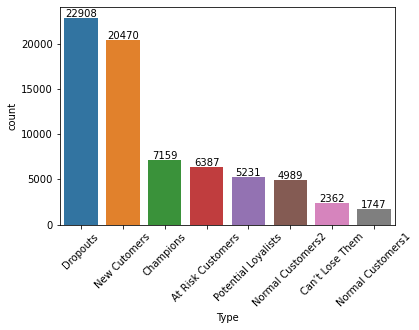

In [40]:
plt.xticks(rotation=45)
ax = sns.countplot(x=RFM_new['Type'],order=RFM_new.Type.value_counts().index)

for x,y in enumerate(RFM_new.Type.value_counts()):
    text = ax.text(x,y + 100,y)
    text.set_ha('center')

+ 非優良顧客（Dropouts）の人数は最も多い22915人であり、一方で超優良顧客（Champions）は7160人である。
+ 新規顧客の人数は2番目に多く20472人であり、最近キャンペーンなどが行われた可能性がある。
+ 優良顧客であるが、最近消費していない「At Risk Customers」や「Can’t Lose Them」と呼ばれる顧客の数も多く、何とか対応しなければならない。


### K-Means

In [113]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [118]:
RFM_K = RFM.loc[:,['user_id','R','F','M']]

RFM_K.set_index('user_id', inplace = True)

RFM_K.head()

,R,F,M
user_id,,,
user-100000,79,1,1770.81
user-100003,221,1,511.59
user-100006,47,1,443.55
user-100007,351,1,2162.14
user-100008,45,1,4879.94


In [119]:
RFM_K2 = np.log(RFM_K + 1)

# 値の差を縮めるために、対数変換を行う。

g = StandardScaler()
Stand_data = g.fit_transform(RFM_K2)
RFM_Stand = pd.DataFrame(Stand_data,columns=RFM_K2.columns,index=RFM_K2.index)
RFM_Stand.describe()

# 単位の違いがクラスタリングの結果に影響を与えるため、まずはRFMの数値を標準化する

,R,F,M
count,7.125300e+04,7.125300e+04,7.125300e+04
mean,-1.025725e-15,-8.846769e-14,7.817355e-16
std,1.000007e+00,1.000007e+00,1.000007e+00
min,-4.449291e+00,-5.185329e-01,-6.462006e+00
25%,-5.132068e-01,-5.185329e-01,-6.146561e-01
50%,2.753747e-01,-5.185329e-01,-5.668282e-02
75%,7.322580e-01,-5.185329e-01,7.015921e-01
max,1.199749e+00,6.315030e+00,4.381795e+00


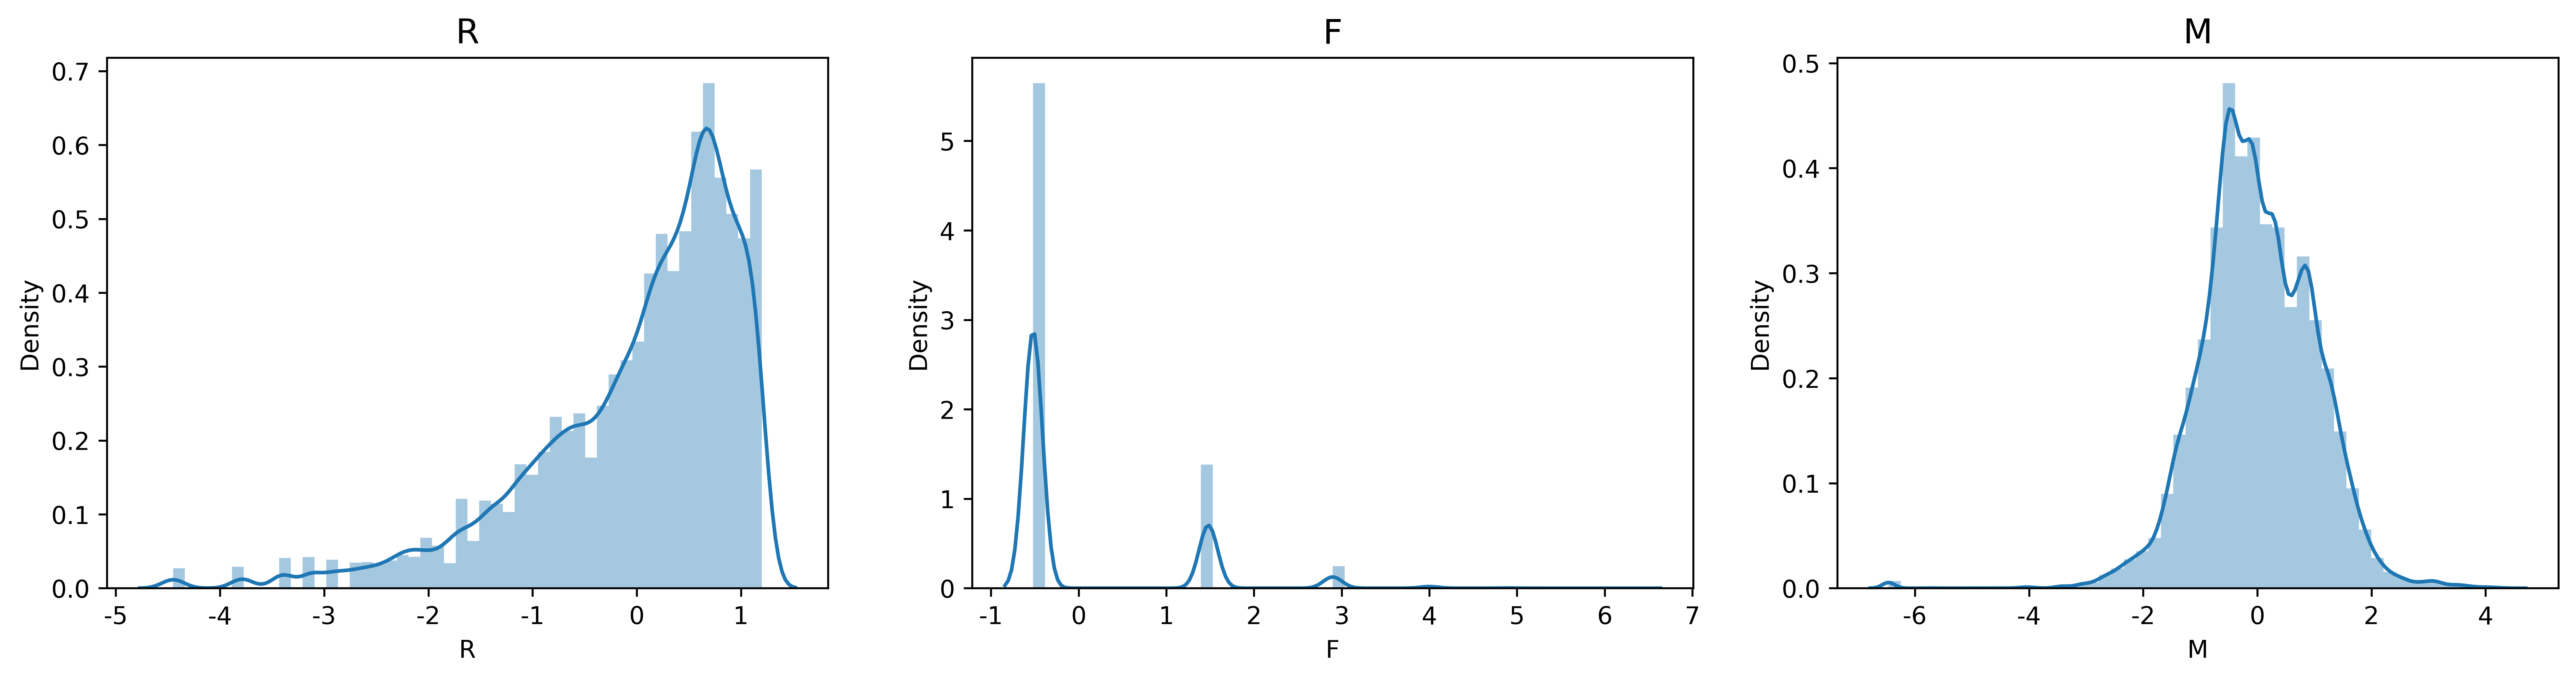

In [124]:
keyvalue = ['R','F','M']
data_distribution(keyvalue,RFM_Stand)

# RとMについては著しく改善され、Fについても少し改善された。

In [121]:
RFM_Stand.isnull().sum()

R    0
F    0
M    0
dtype: int64

In [122]:
SSE = []
# Elbow Method 
ch_score = []
# Calinski-Harabasz
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 200, algorithm="auto",random_state = 12)
    model = kmeans.fit(RFM_Stand)
    pre = model.predict(RFM_Stand)
    ch = float(metrics.calinski_harabasz_score(RFM_Stand,pre))
    SSE.append(kmeans.inertia_)
    ch_score.append(ch)
    print(k)
    
# 各kの値でトレニングしてみる。


2
3
4
5
6
7
8
9
10


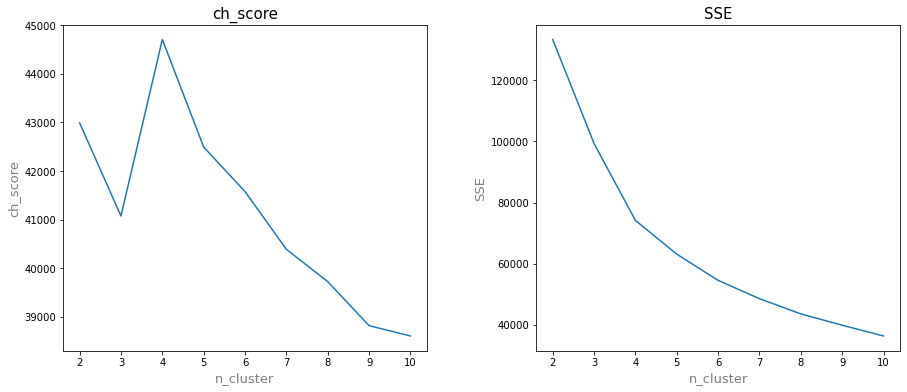

In [123]:
score = pd.Series([ch_score, SSE], index = ['ch_score', 'SSE'])
key = score.index.tolist()
plt.figure(figsize = (15,6))
j = 1 
for i in key:
    plt.subplot(1,2,j)
    plt.plot(list(range(2,11)), score[i])
    plt.xlabel('n_cluster', fontsize = 13, color = 'grey')
    plt.ylabel(f'{i}', fontsize = 13, color = 'grey')
    plt.title(f'{i}', fontsize = 15)
    j += 1
plt.subplots_adjust(wspace = 0.3)

図から判断すると、k=4は妥当だと考えられる。

In [125]:
from sklearn.metrics import silhouette_score

kc = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 200, algorithm="auto",random_state = 12)
kc.fit(RFM_Stand)
print(silhouette_score(RFM_Stand,kc.labels_))

0.37665789121659576


silhouette_scoreは1に近ければ近いほど効果がいい。ここは観察するだけ。

In [128]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 200, algorithm="auto",random_state = 12)
result = kmeans.fit(RFM_Stand)
pre = model.predict(RFM_Stand)
ch = float(metrics.calinski_harabasz_score(RFM_Stand,pre))

print('Label:',kmeans.labels_)
# 各サンプル所属のクラスターを獲得する。

print('SSE:',kmeans.inertia_)
print('c_l_score:', ch)
# 評価指標

print('times:',kmeans.n_iter_)
# 停止条件を満たすまでの繰り返し回数

print('score:',kmeans.score(RFM_Stand))
# SSEの逆数、高ければ高いほど効果がいい。

Label: [0 1 2 ... 3 1 1]
SSE: 74159.05657022829
c_l_score: 38601.73580420958
times: 26
score: -74159.05657022829


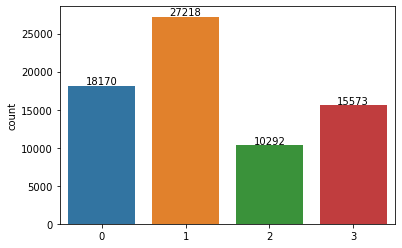

In [135]:
qt = pd.Series(kmeans.labels_).value_counts().sort_index()
ax = sns.countplot(x=kmeans.labels_,order=qt.index)

for x,y in enumerate(qt):
    text = ax.text(x,y+200,y)
    text.set_ha('center')

# 各クラスターのサンプル数を示す

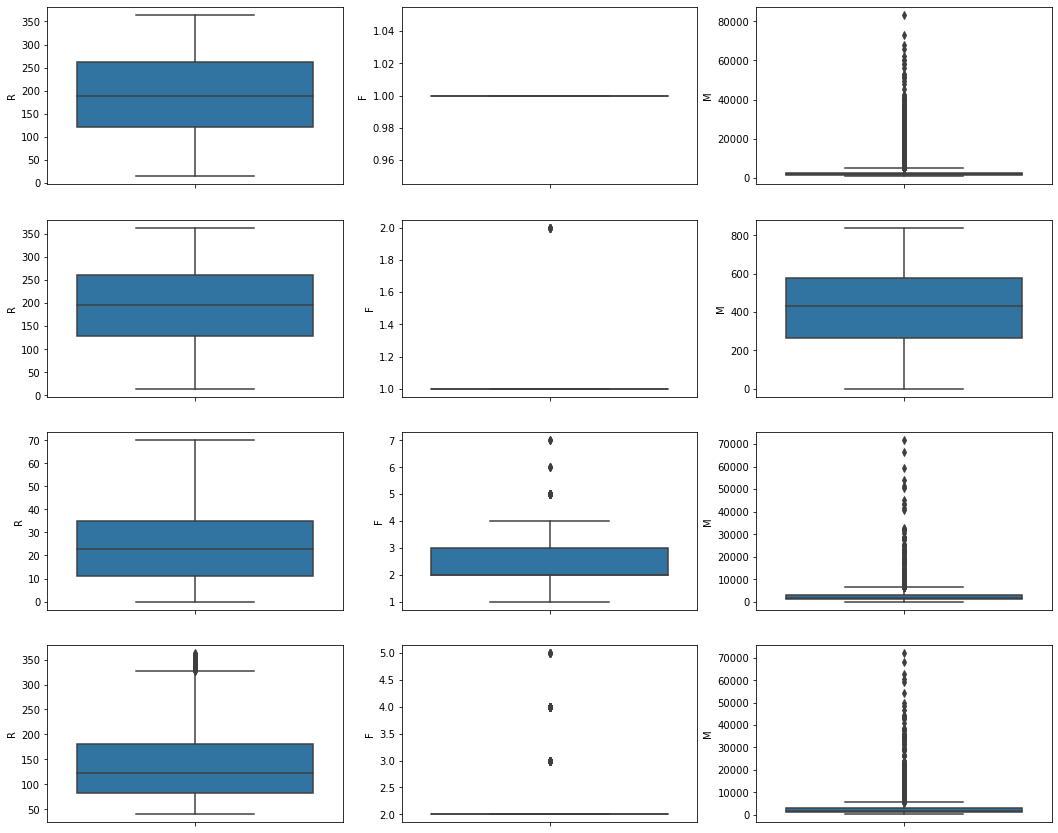

In [167]:
# RFMで当て嵌めてみる。

fig,ax = plt.subplots(4,3)
fig.set_size_inches(18,15)
for i in range(4):
    temp = RFM[kmeans.labels_ == i]
    # 各クラスターに所属する顧客のデータを抽出する。
    sns.boxplot(y = 'R',data = temp,ax = ax[i][0])
    sns.boxplot(y = 'F',data = temp,ax = ax[i][1])
    sns.boxplot(y = 'M',data = temp,ax = ax[i][2])

+ 一番目のクラスター「0」：R高い、F低い、M高い。優良顧客（Potential Loyalists）は含まれていると想定する。そういう顧客の消費頻度を高めるに注力すべきだと考える。
+ 二番目のクラスター「1」：R高い、F低い、M低い。新規顧客または一般的な顧客の特徴に近いと言える。人数は一番多いことにより、2022の新規顧客開発の効果はいいと考えられる。
+ 三番目のクラスター「2」: R低い、F低い、M低い。でもMの異常値が多く。恐らく非優良顧客と一部の優良顧客（At Risk Customers、Can’t Lose Them）が混在していると考えられる。
+ 四番目のクラスター「3」：R高い、F高い、M高い。優良顧客と超優良顧客が含まれている。最も大事な顧客層である。

+ 問題点：非優良顧客（離反顧客）が明確に識別されていないため、このクラスタリングに基づいて今後のビジネスを展開すると、無駄な施策が多くなる可能性があります。

In [168]:
for k in [3,4,5]:
    kc = KMeans(n_clusters = k, init = 'k-means++', max_iter = 200, algorithm="auto",random_state = 12)
    kc.fit(RFM_Stand)
    print(f'{k}',silhouette_score(RFM_Stand,kc.labels_))

KeyboardInterrupt: 

silhouette_scoreは1に近ければ近いほど効果がいい。
k＝3で実行してみる。

In [172]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, algorithm="auto",random_state = 12)
result = kmeans.fit(RFM_Stand)
pre = model.predict(RFM_Stand)
ch = float(metrics.calinski_harabasz_score(RFM_Stand,pre))

print('Label:',kmeans.labels_)
print('SSE:',kmeans.inertia_)
print('c_l_score:', ch)
print('times:',kmeans.n_iter_)
print('score:',kmeans.score(RFM_Stand))

Label: [1 1 2 ... 0 1 1]
SSE: 99289.87287683599
c_l_score: 38601.73580420958
times: 16
score: -99289.87287683599


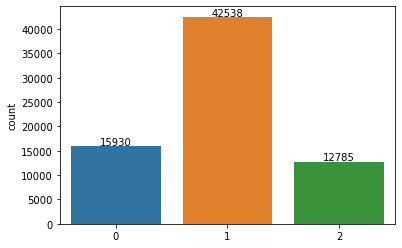

In [173]:
qt = pd.Series(kmeans.labels_).value_counts().sort_index()
ax = sns.countplot(x=kmeans.labels_,order=qt.index)

for x,y in enumerate(qt):
    text = ax.text(x,y+200,y)
    text.set_ha('center')

# 各クラスターのサンプル数を示す

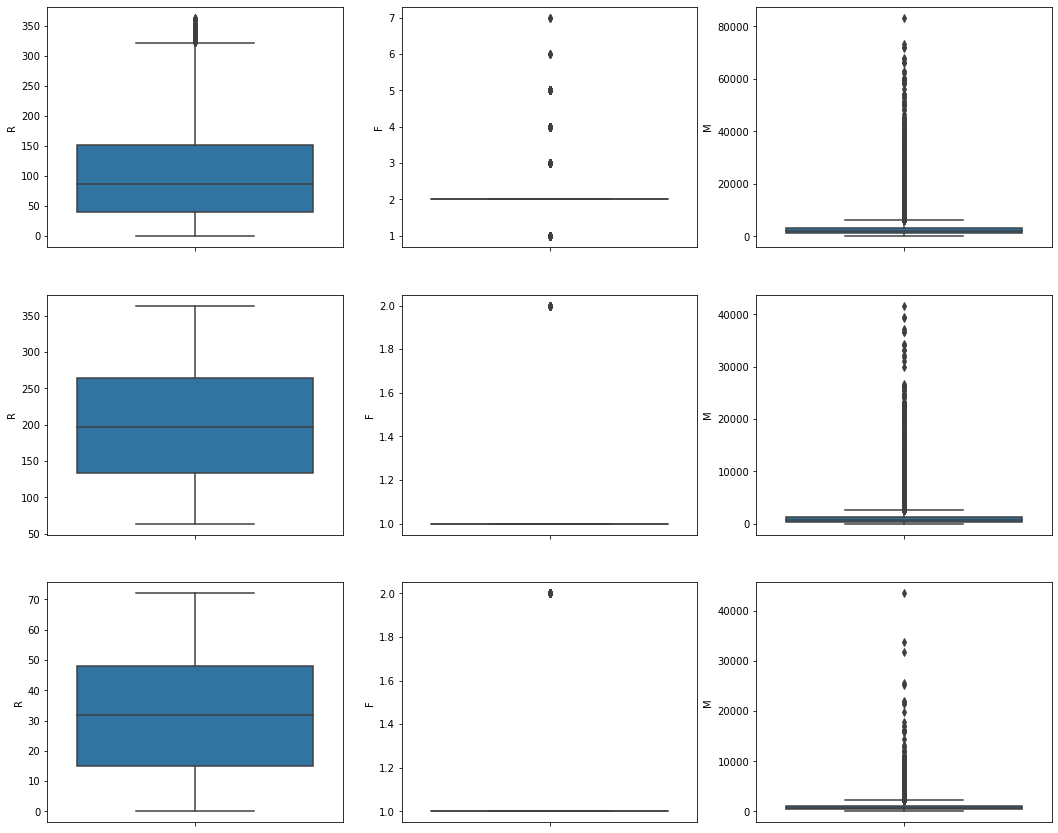

In [174]:
# RFMで当て嵌めてみる。

fig,ax = plt.subplots(3,3)
fig.set_size_inches(18,15)
for i in range(3):
    temp = RFM[kmeans.labels_ == i]
    # 各クラスターに所属する顧客のデータを抽出する。
    sns.boxplot(y = 'R',data = temp,ax = ax[i][0])
    sns.boxplot(y = 'F',data = temp,ax = ax[i][1])
    sns.boxplot(y = 'M',data = temp,ax = ax[i][2])

+ 一番目のクラスター「0」：R高い、F高い、M高い。優良顧客（Potential Loyalists）と超優良顧客は含まれていると想定する。
+ 二番目のクラスター「1」：R高い、F低い、Mやや高い。新規顧客と一般的な顧客の特徴に近いと言える。人数も一番多い。
+ 三番目のクラスター「2」: R低い、F低い、Mやや高い。依然として非優良顧客と一部の優良顧客（At Risk Customers、Can’t Lose Them）が混在している

k＝5で実行してみる。

In [175]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 200, algorithm="auto",random_state = 12)
result = kmeans.fit(RFM_Stand)
pre = model.predict(RFM_Stand)
ch = float(metrics.calinski_harabasz_score(RFM_Stand,pre))

print('Label:',kmeans.labels_)
print('SSE:',kmeans.inertia_)
print('c_l_score:', ch)
print('times:',kmeans.n_iter_)
print('score:',kmeans.score(RFM_Stand))

Label: [0 1 4 ... 3 1 1]
SSE: 63138.34115900992
c_l_score: 38601.73580420958
times: 13
score: -63138.341159009906


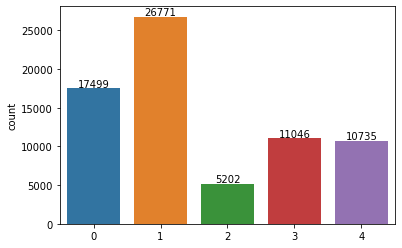

In [176]:
qt = pd.Series(kmeans.labels_).value_counts().sort_index()
ax = sns.countplot(x=kmeans.labels_,order=qt.index)

for x,y in enumerate(qt):
    text = ax.text(x,y+200,y)
    text.set_ha('center')

# 各クラスターのサンプル数を示す

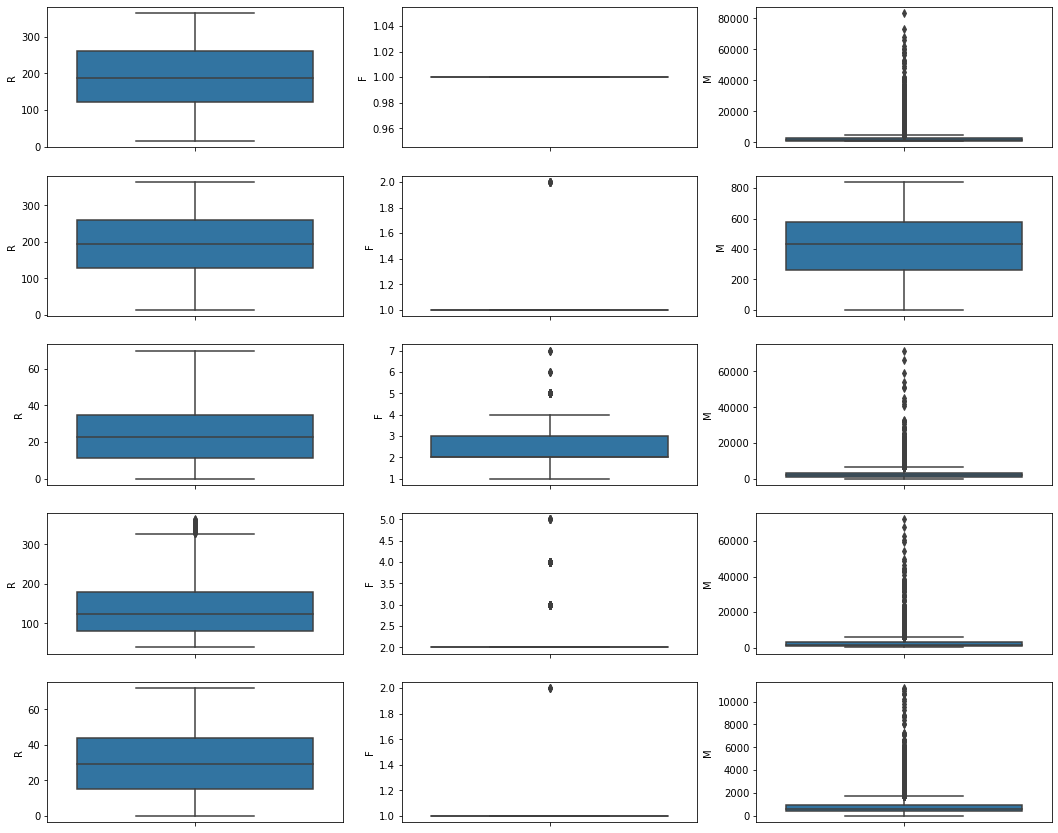

In [178]:
# RFMで当て嵌めてみる。

fig,ax = plt.subplots(5,3)
fig.set_size_inches(18,15)
for i in range(5):
    temp = RFM[kmeans.labels_ == i]
    # 各クラスターに所属する顧客のデータを抽出する。
    sns.boxplot(y = 'R',data = temp,ax = ax[i][0])
    sns.boxplot(y = 'F',data = temp,ax = ax[i][1])
    sns.boxplot(y = 'M',data = temp,ax = ax[i][2])

+ 一番目のクラスター「0」：R高い、F低い、M高い。優良顧客（Potential Loyalists）と超優良顧客は含まれていると想定される。
+ 二番目のクラスター「1」：R高い、Fやや高い、M低い。新規顧客と一般的な顧客の特徴に近いと言える。
+ 三番目のクラスター「2」: R低い、F高い、Mやや高い。優良顧客（At Risk Customers、Can’t Lose Them）の比率が多いと想定する。
+ 四番目のクラスター「3」：Rやや高い、Fやや高い、Mやや高い。一番目と類似して、金額面では少し劣ってるが、頻度は一番目より高い。優良顧客と超優良顧客が含まれていると考えられる。
+ 五番目のクラスター「3」：R低い、F低い、Mやや低い。非優良顧客は大部分であると想定される。



+ 結論的に、k＝5の場合には非優良顧客層を見分けられるため、最も適していると考えられる。